## Session 4 Homework

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

In [183]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import KFold

In [2]:
# get and load data
df = pd.read_csv('AER_credit_card_data.csv')

In [3]:
df.sample(8)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
173,yes,0,26.50000,3.00,0.048656,121.555800,yes,no,0,12,1,4
981,yes,1,58.91667,2.70,0.003222,6.416667,yes,no,0,252,1,8
253,yes,0,26.91667,1.90,0.026674,41.816670,no,no,0,18,1,9
1109,yes,1,28.16667,2.50,0.003200,5.833333,no,no,1,24,1,6
737,yes,0,23.50000,1.83,0.071570,108.977500,no,no,1,12,0,10
459,yes,1,30.00000,4.00,0.051054,170.180800,yes,no,5,28,1,7
1292,no,0,36.00000,4.50,0.000267,0.000000,yes,no,2,228,1,0
452,yes,0,27.08333,3.25,0.008602,22.462500,yes,no,0,48,1,6


### Data Preparation

In [18]:
df['card'] = (df['card'] =='yes').astype(int)

In [19]:
df.sample(8)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
956,1,1,44.25000,7.6000,0.049064,310.73580,yes,no,6,207,1,11
863,1,0,46.00000,1.8000,0.033500,49.41667,no,no,1,168,1,2
987,0,0,25.58333,1.7500,0.000686,0.00000,no,no,0,108,0,0
491,1,0,23.66667,2.3000,0.007782,14.33167,no,no,2,14,0,0
760,1,0,37.08333,5.2000,0.059158,256.18670,no,no,0,12,0,0
170,0,1,29.16667,2.4750,0.000485,0.00000,no,no,1,12,0,5
158,1,0,29.41667,4.1000,0.042648,145.37920,no,no,0,13,1,0
437,1,0,27.16667,2.6796,0.007277,15.58333,no,no,4,36,1,4


In [37]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [38]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.599696739954511, 0.2001516300227445, 0.2001516300227445)

In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [40]:
df_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


In [42]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

In [43]:
# drop target column
df_train = df_train.drop('card', axis=1)
df_val = df_val.drop('card', axis=1)
df_test = df_test.drop('card', axis=1)

In [44]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


### Question 1

In [50]:
df.dtypes

card             int32
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [62]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [67]:
auc?

In [85]:
scores = []
names = []
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    print('Col: {} with AUC: {}'.format(col, auc))
    names.append(col)
    scores.append(auc)

Col: reports with AUC: 0.7166629860689376
Col: age with AUC: 0.5240020979407055
Col: income with AUC: 0.5908049467233478
Col: share with AUC: 0.989183643423692
Col: expenditure with AUC: 0.991042345276873
Col: dependents with AUC: 0.5327757227773791
Col: months with AUC: 0.5294217780967629
Col: majorcards with AUC: 0.5343859842838476
Col: active with AUC: 0.6043173411362006


In [86]:
scores

[0.7166629860689376,
 0.5240020979407055,
 0.5908049467233478,
 0.989183643423692,
 0.991042345276873,
 0.5327757227773791,
 0.5294217780967629,
 0.5343859842838476,
 0.6043173411362006]

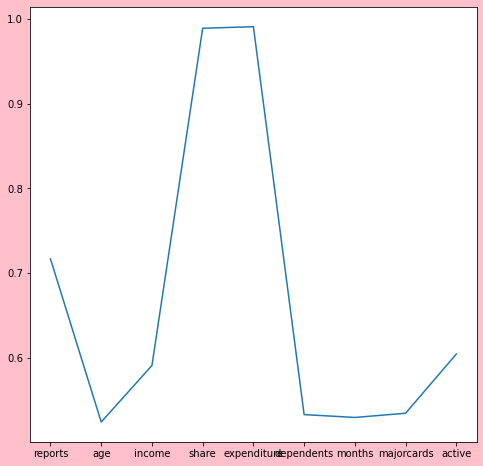

In [94]:
plt.figure(figsize=(8,8),facecolor='pink')
plt.plot(names, scores)

From the above, we can see the highest are: `share & expenditure`

In [95]:
features = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

In [96]:
features

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active',
 'owner',
 'selfemp']

In [97]:
df_train.head()

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


### Question 2

In [99]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [100]:
dv.get_feature_names_out()

array(['active', 'age', 'dependents', 'expenditure', 'income',
       'majorcards', 'months', 'owner=no', 'owner=yes', 'reports',
       'selfemp=no', 'selfemp=yes', 'share'], dtype=object)

In [101]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [102]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [103]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [104]:
y_pred = model.predict_proba(X_val)[:, 1]

In [106]:
# get AUC score
auc = roc_auc_score(y_val, y_pred).round(3)
auc

0.995

The AUC under the curve is `99.5%`

### Question 3

In [159]:
thresholds = np.arange(0,1,0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [160]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        # tp - true positive, tn - true negative, fp - false positive, fn - false negative
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    df_scores = pd.DataFrame(scores,  columns = ['threshold', 'tp', 'fp', 'fn', 'tn'])
    return df_scores

In [161]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [162]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [163]:
# precision = tp / tp + fp
# recall = tp / tp + fn

df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [164]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


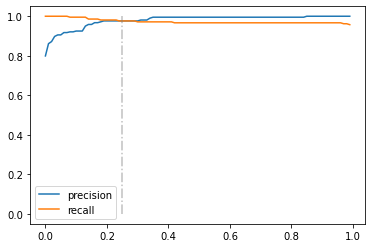

In [167]:
plt.plot(df_scores.threshold, df_scores.precision,label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.vlines(0.25, 0, 1, color='grey', linestyle='dashdot', alpha=0.5)

plt.legend()
plt.show()

**`0.25`** is the point where the two lines meet

### Question 4
Compute F1 score

F1 = 2 * P * R / (P + R)

In [178]:
df_scores['f1'] = (2 * df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)

In [179]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.0,211,53,0,0,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
20,0.2,207,5,4,48,0.976415,0.981043,0.978723
30,0.3,205,5,6,48,0.976190,0.971564,0.973872
40,0.4,205,1,6,52,0.995146,0.971564,0.983213
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,1.000000,0.966825,0.983133


In [180]:
df_scores.f1.max()

0.9832134292565947

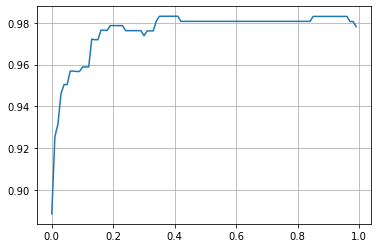

In [182]:
plt.plot(df_scores.threshold, df_scores.f1,label='f1')
plt.grid()

From the above **`0.4`** is the highest

### Question 6

In [229]:
def train(df_train, y_train,C=1.0):
    """
    Train a model
    """
    train_dict = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [230]:
def predict(df, dv, model):
    val_dict = df.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return y_pred

In [231]:
scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    
(np.mean(scores), np.std(scores))

(1.0, 0.0)

Answer will be **`0.003`**

### Question 7


In [240]:
for c in [0.01, 0.1, 1, 10]:
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train,C=c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C={}, with mean={} and std={}'.format(c,np.mean(scores).round(3), np.std(scores).round(3)))

C=0.01, with mean=0.993 and std=0.005
C=0.1, with mean=0.999 and std=0.001
C=1, with mean=1.0 and std=0.0
C=10, with mean=1.0 and std=0.0


**`C = 1`**